# Recap: Node Embeddings
- Intution: Map nodes to d-dimesional emebeddings such that similar nodes in the graph are embedded close together.
- 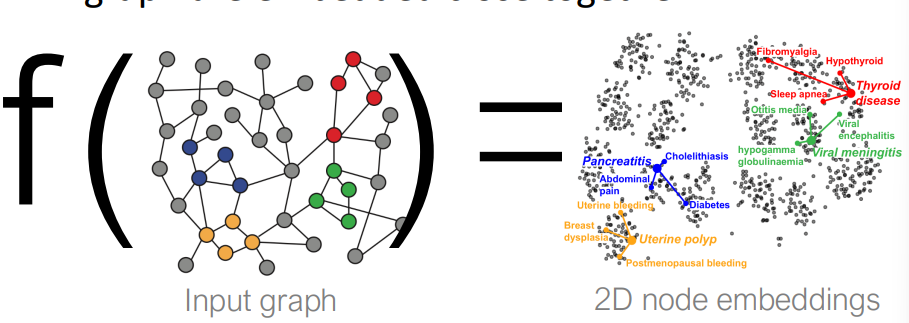
- How to learn mapping function f?
- 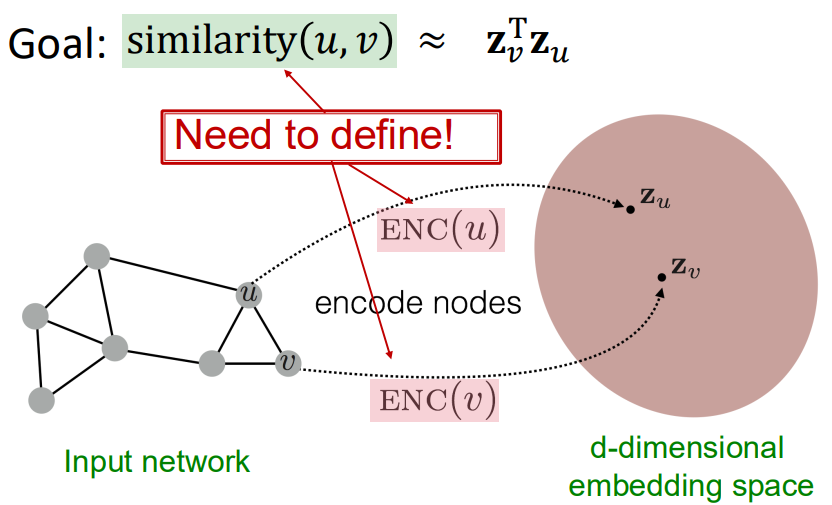

## shallow encoding
- Simplest encoding approach: Encoder is just an embedding-lockup
- 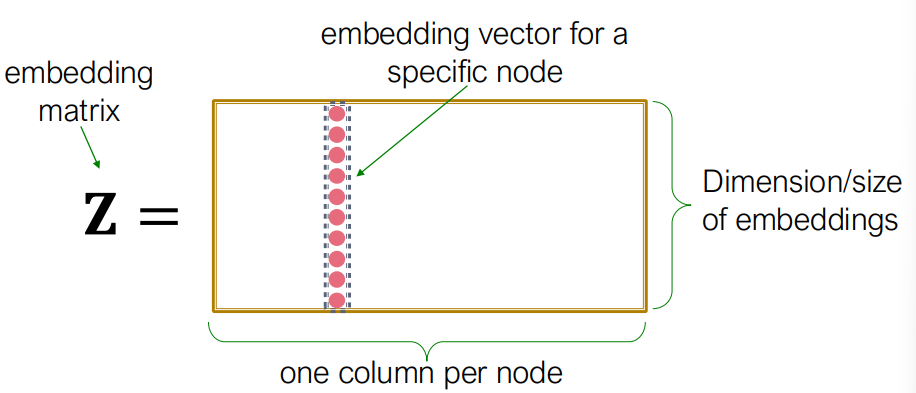
- Limitations of shallow mbedding methods:
    - O(|V|d) parameters are needed:
        - No sharing of parameters between nodes
        - Every node has its own unique embedding
    - Inherently 'transductive'
        - Cannot generate embeddings for nodes that are not seen during training
    - Do not incorporate node features
        - Nodes in many graphs have features that we can and should leverage

# Deep Graph Encoders
- We will discuss deep learning methods based on graph neural networks (GNNs)
    - ENC(v) = multiple layer of non-linear transformations based on graph structure
- All these deep encoders can be combined with node similarity functions.
- 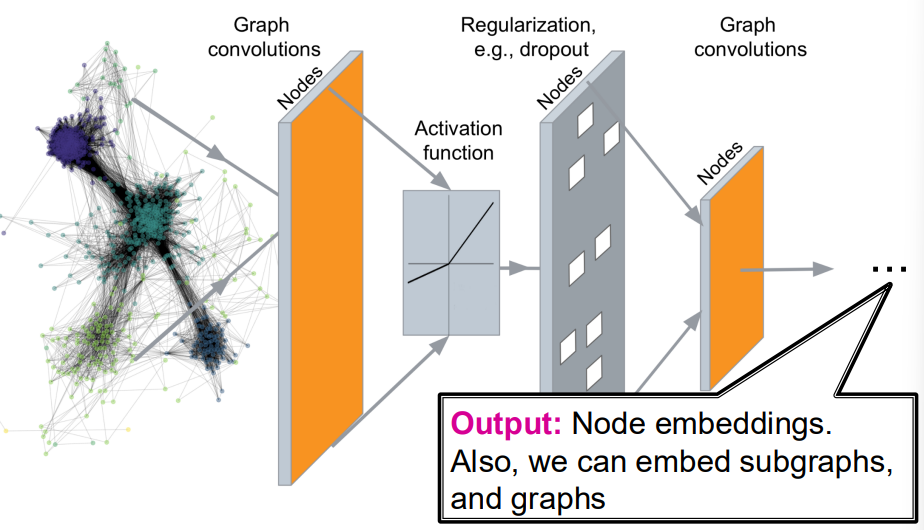

### Tasks on Networks
- Tasks we will be able to solve:
    - Node classification
        - Predict the type of a given node
    - Link Prediction
        - Predict whether 2 nodes are linked
    - Community detection
        - Identify densely linked clusters of nodes
    - Network similarity
        - How similar 2 (sub) networks are

## Modern ML toolbox
- Modern deep learning toolbox is designed for simple sequences & grids
- 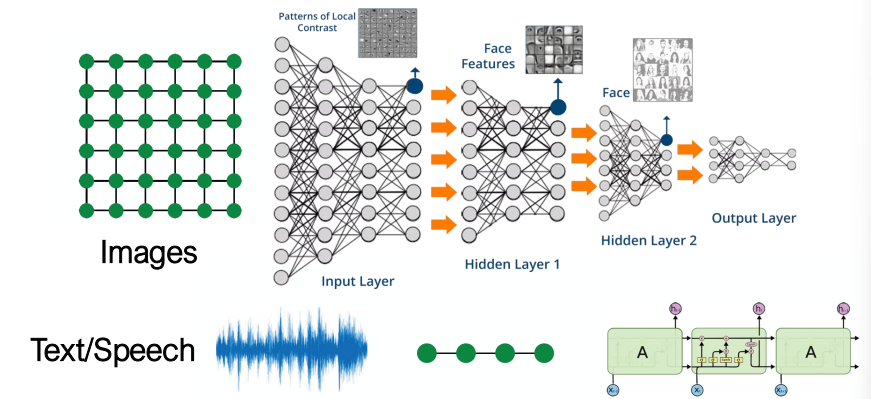

- But networks are far more complex
    - Arbitrary size and complex topological structure (i.e., no spatial locality like grids)
        - 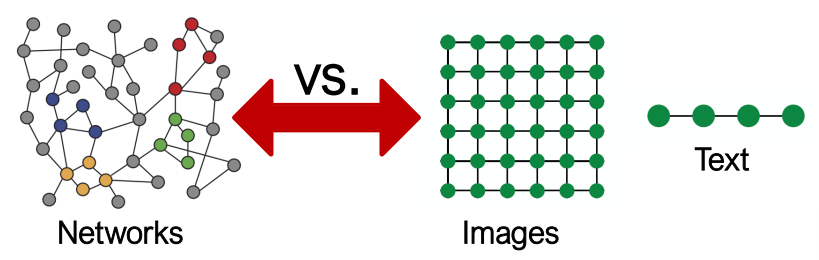
    - No fixed node ordering or reference point
    - Often dynamic and have multimodal features

## Basics of Deep Learning
- Loss function L:
- f can be simple linear layer, an MLP  or other neural networks (e.g., a GNN layer)
- Sample a minibatch of input data x
- Forward propagation: Compute L given x
- Back propagation: Obtain gradient using a chain rule
- Use stochastic gradient descent (SGD) to optimize L for weights over may iterations

## Deep Learning for Graphs
- Local network neighborhoods:
    - Describe aggregation strategies
    - Define computation graphs
- Stacking multiple layers
    - Describe the model, parameters, training
    - How to fit the model?
    - Simple example for unsupervised and supervised training.

## Setup
- Assume we have a graph G
    - V is the vertex set
    - A is the adjacency matrix (assume binary)
    - X belongs to R is a matrix of node features
    - v: a node in V; N(v): the set of neighbors of v/
    - Node features:
        - Social networks: user profile, user image
        - Biological networks: Gene expression profiles, gene functioal information
        - When there is no node feature in the graph dataset"
            - Indicator vectors (one-hot encoding of a node)
            - vector of constant 1: [1, 1, 1, 1.....,1]

## A Naive Approach
- Join adjacency matric and features
- Feed them into a deep neural netrowk
- 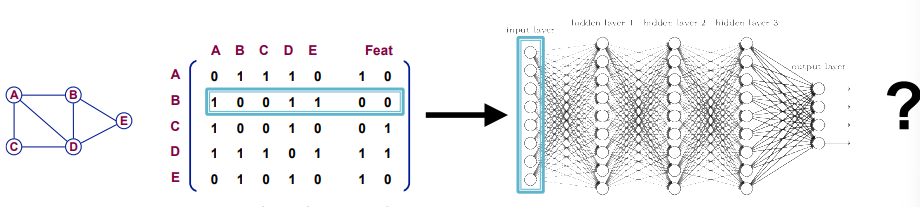
- Issues with this idea:
    - O(|V|) parameters
    - Not applicable to graphs of different sizes
    - Sensitive to node ordering

## IdeaL Convolutional Networks
- CNN on an image
- 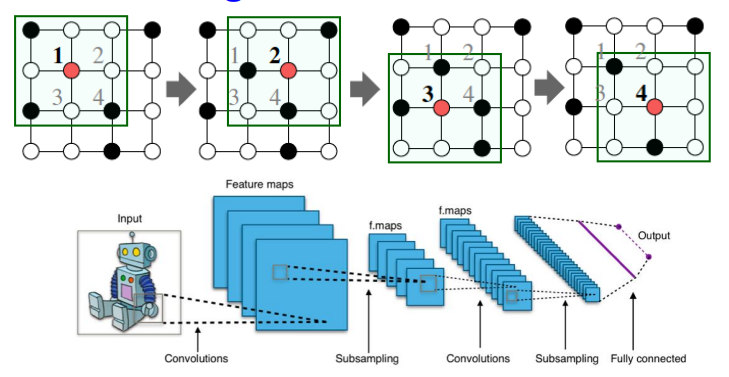
- Goal is to generalize convolutions beyond simple lattices leverage node features/attributes (e.g., text, images)

## Real-world graphs
- But our graphs look like this:
- 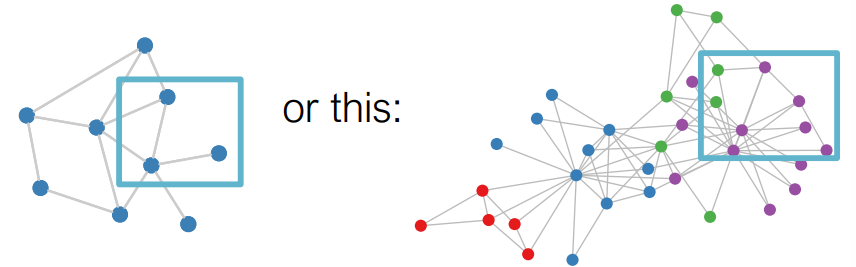
- There is not fixed notion of locality or sliding window on the graph
- Graphs are permutation invariant

### Permutation invariance
- Imagine we want to embed an entire graph
- Observation: A graph does not have a canoical ordering of its nodes
    - We can have many different node orderings of the same graph
- What do we want: If we learn an embedding function over a graph, we should get the same result (same embedding) regardless of how the nodes are numbered
- 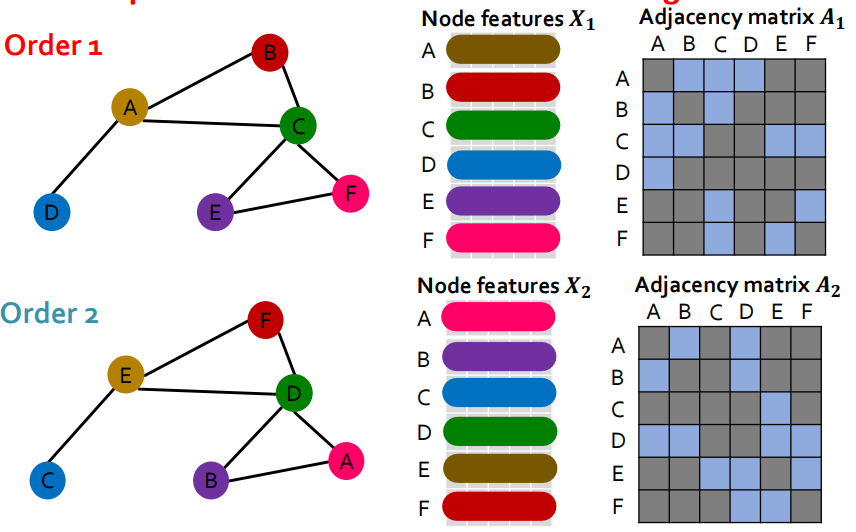
- Learned graph representation should be the samem for Order 1 and Order 2
- What do we mean by graph representation is the same for 2 orderings?
    - Consider we learn a fucntion f that mapes a graph G = (A, X) to a vector R_d then
        - 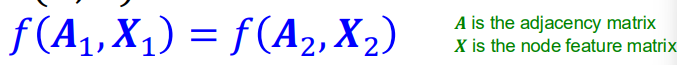
- 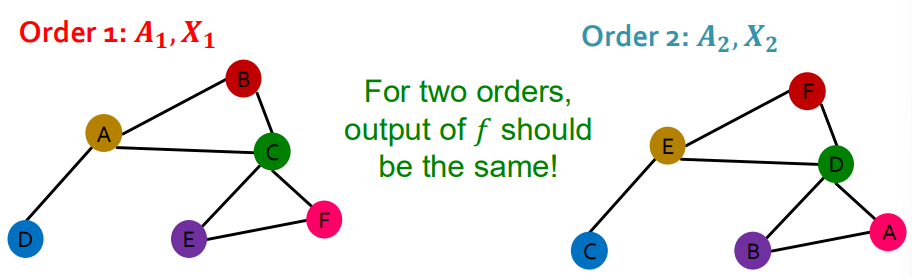
- 

## Permutation Equivariance
- For node representation: We learn a function f that mas nodes of G to a matrix R
- In other words, each node in V is mapped to a d-dim embedding.
- 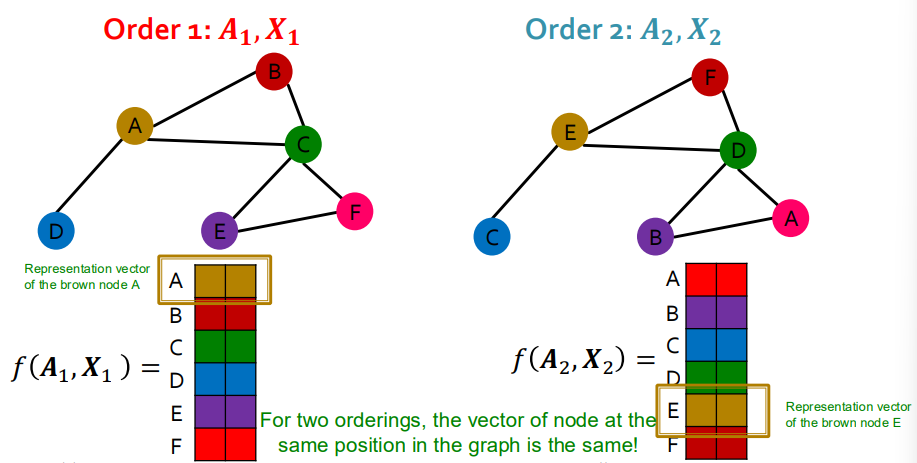

- For node representation: 
    - Consider we learn a function f that maps a graph G = (A, X) to a matri R
    - If the output vector of a node at the same position in the graph remains unchanged for any ordering, we say f is permutation equivariant.

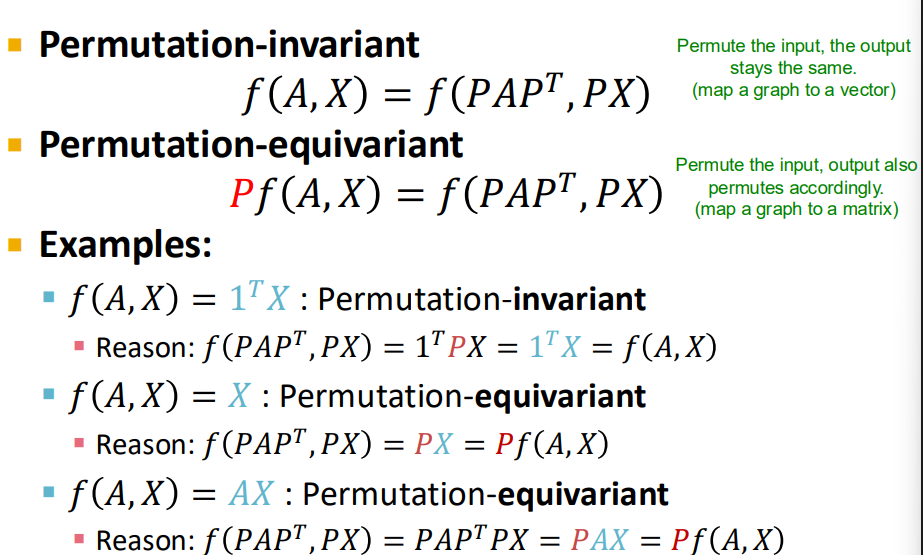

## Graph Neural Network overview
- Graph neural networks consist of multiple permutation equivariant / invariant functions
- 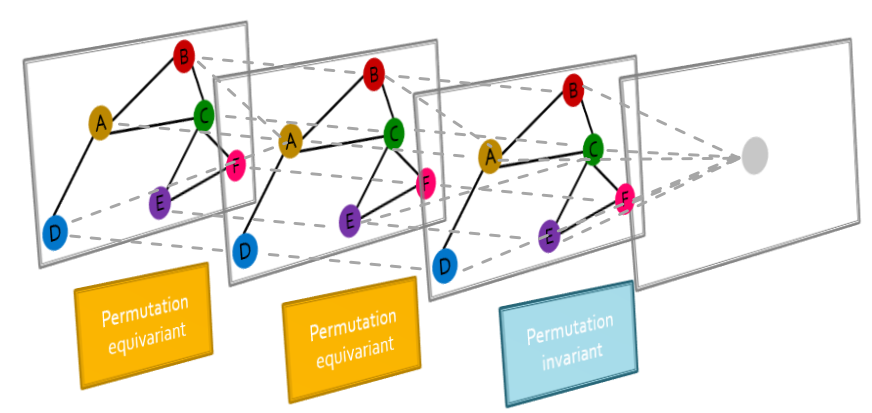
- Are other neural network architectures (MLPs) permutation invariant/equivariant? No. Switching the order of the input leads to different outputs!
- 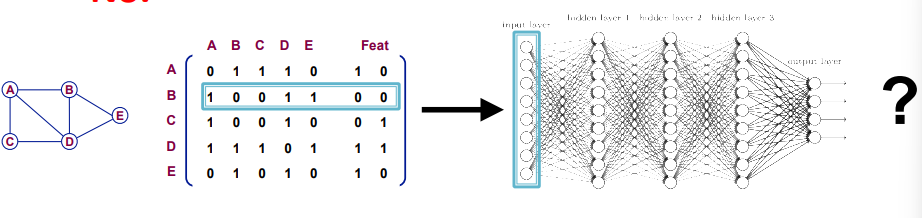
- This exaplins why the naive MLP approach fails for graphs!

# Graph Convolutional Networks
- Idea: Node's neighborhood defines a computation graph
- 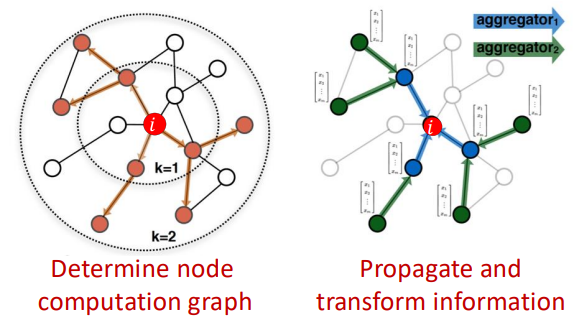
- Learn how to propgate information across the graph to compute node features.

## Idea: Aggrgeate Neighbors:
- Key idea: Generate node embeddings based on local network neighborhood
    - 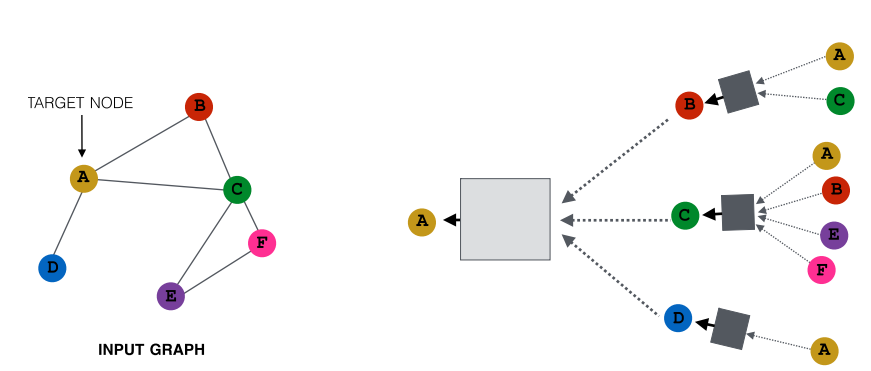
- Intuition: Nodes aggregate information from their neighbors using neural networks
- 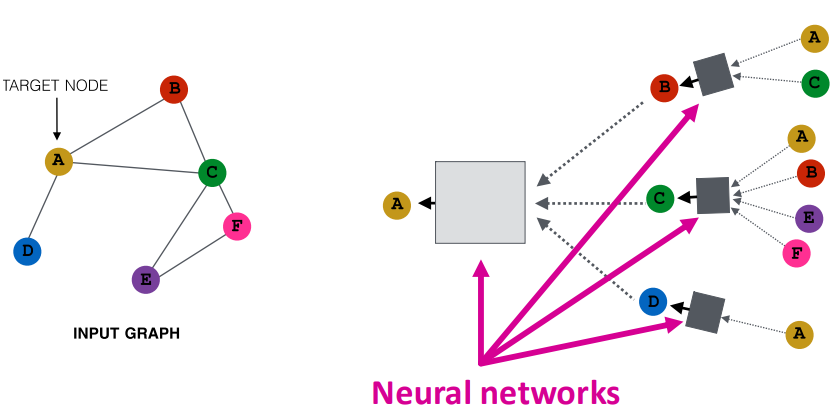
- Intuition: Network neighborhood defines a computation graph
    - Every node defines a computation graph based on its neighborhood'
    - 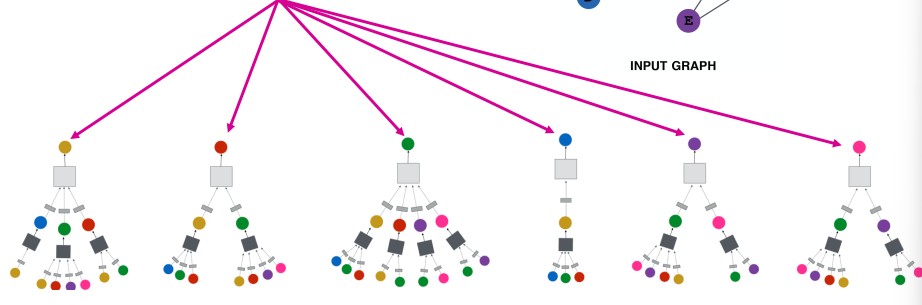

## Deep Model: Many Layers
- Model can be of arbitrary depth:
    - Nodes have embeddings at each layer
    - Layer-0 embedding of node v is its input feature, x_v
    - Layer-k embedding gets information from nodes that are k hops away
    - 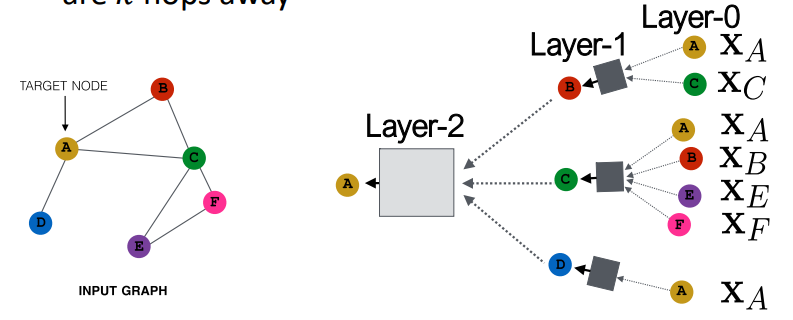

## Neighborhood Aggregation
- Key distinctions are in how different approaches aggregate information across the layers.
- Basic Approach: Average informatiom from neighbors and apply a neural network
- 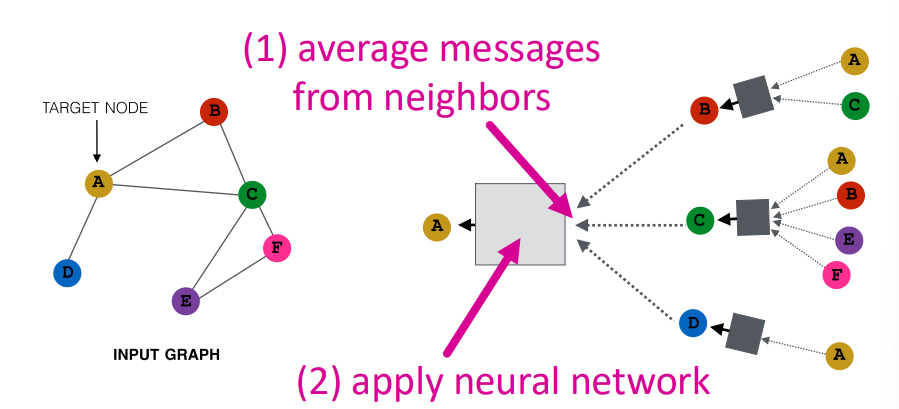

## Math: Deep Encoder of a GCN
- Basic Approach: Average neighbor messages and apply a neural network
- 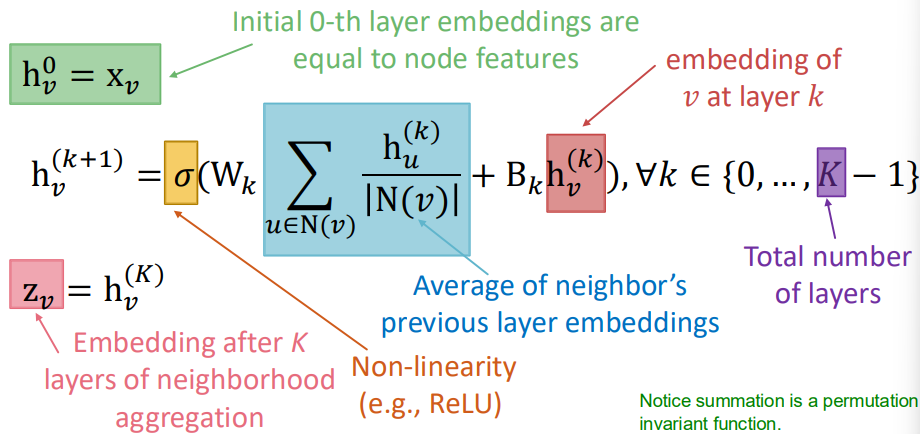
- 

## GCN: Invariance and Equivariance
- What are the invariance and equivariance properties for a GCN
    - Given a node, the GCN that computes its embedding is permutationn invariant.
    - 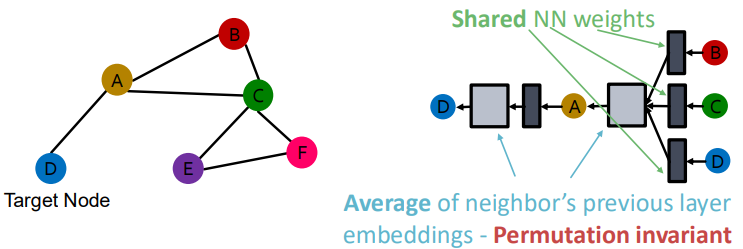
- Considering all nodes in a graph, GCN computation is permutation equivariant
    - 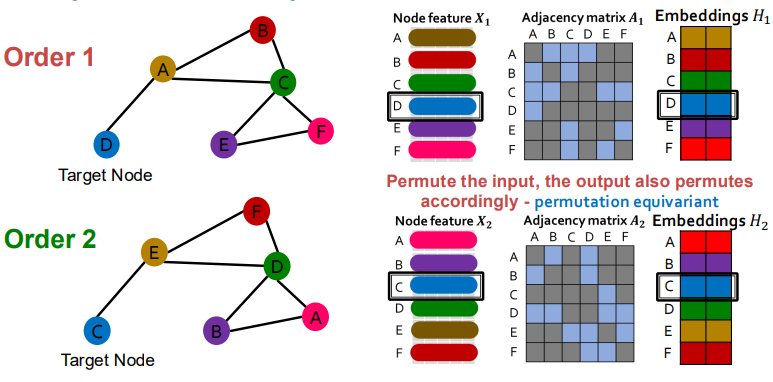

- Detailed resonaining
    1. The rows of input node features and output embeddings are aligned
    2. We know computing the embedding of a given node with GCN is invariant.
    3. So, adter permutation, the location of a given node in the input node feature matrix is changed, and the output embedding of a given node stays the same (the colors of node feature and embedding are matched). This is called permutation equivariant.

## Training the model
- How do we train the GCN to generate embeddings?
- 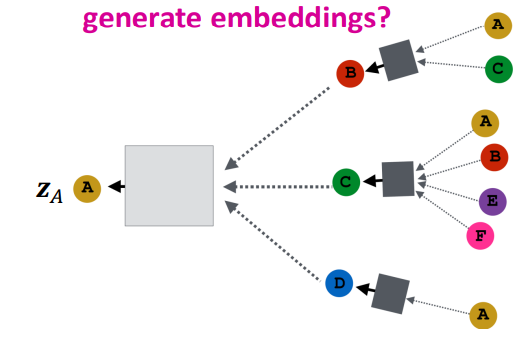
- Need to define a loss function on the embeddings.

## Model Parameters
- 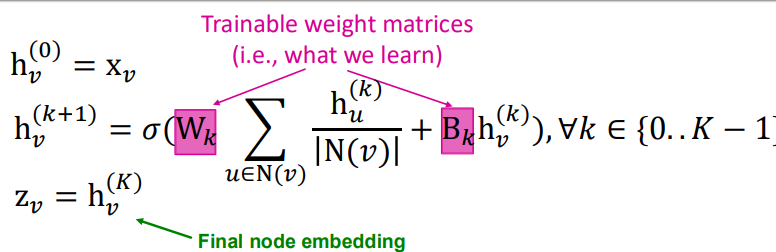
- We can feed these embeddings into any loss function adn run SGD to train the weight parameters
- (h^k)_v: the hidden represenration of node v at layer k
- W_k: weight matrix for neighborhood aggregation
- B_k: weight matrix for transforming hidden vector of sel

## Matrix Formulation (1)
- Many aggrgeations can be performed efficiently by (sparse) matrix operations
    - 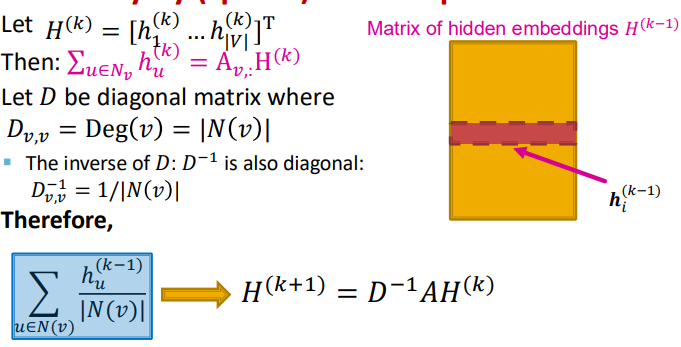

## Matric Formation (2)
- Re-writing update function in matrix form:
    - 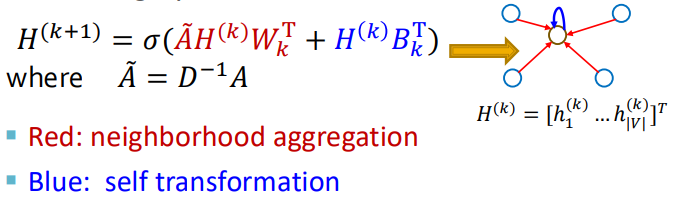
- In practice, this implies that efficient sparse matrix multiplicaton can be used
- Note: not all GNNs can be expressed in a simple matrix form, when aggregation function is complex.

## How to train a GNN
- Node embedding z_v is a function of input graph
- Supervised setting: We want to minimize loss L
    - 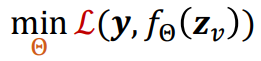
    - y: node label
    - L coulbe be L2 if y is real number or corss entropy if y is categorical
- Unsupervised settings:
    - No node label available
    - Use the graph structure as the supervision.

## Unsupervised Training
- One possible idea: 'Similar' nodes have similar embeddings
    - 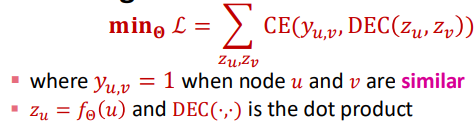
- CE is the cross entropy loss
    - 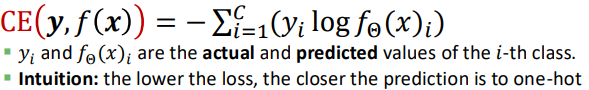
- Node similarity can be anything, e.g., a loss based on
    - Random walks (node2vec, Deepwalk, struc2vec)
    - Matric factorization

## Supervised Training
- Directly train the model for a supervised task (e.g., node classification)
- E.g: A drug-drug interaction network
- 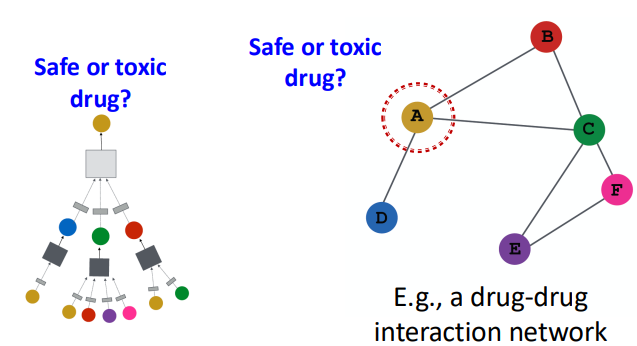
- Use cross entropy loss
    - 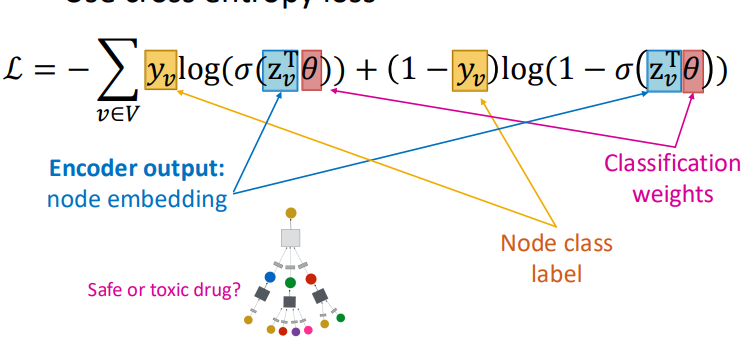

## Model Design: Overview
1. Define a neighborhood aggrgeation function
2. Define a loss function on the embeddings
    - 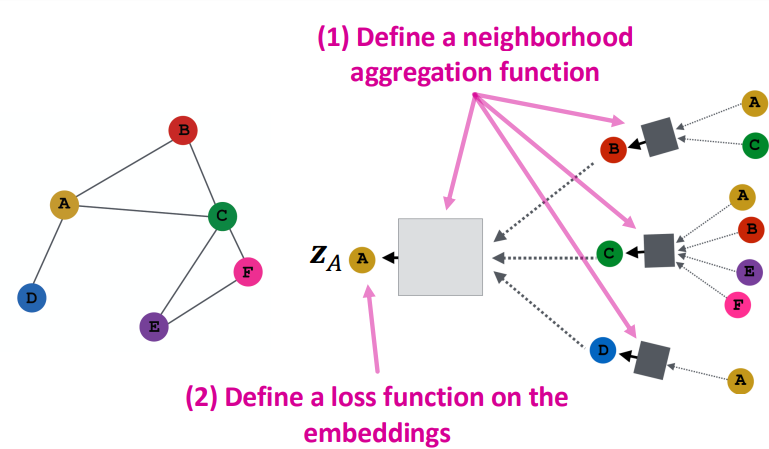
3. Train on a set of nodes, i.e a batch of compute graphs
    - 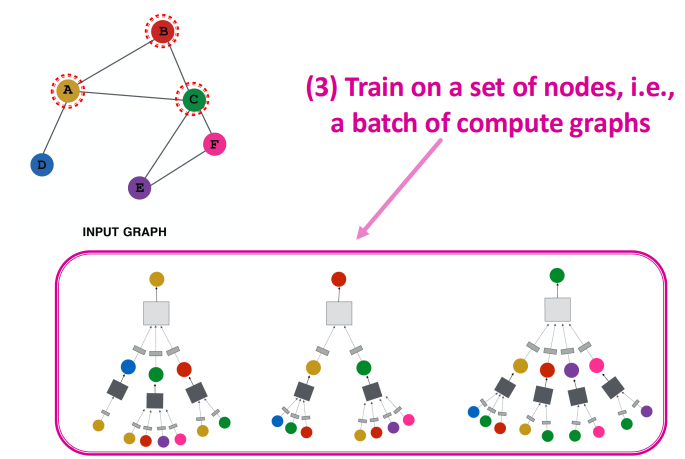
4. Generate embeddings for nodes as needed
    - 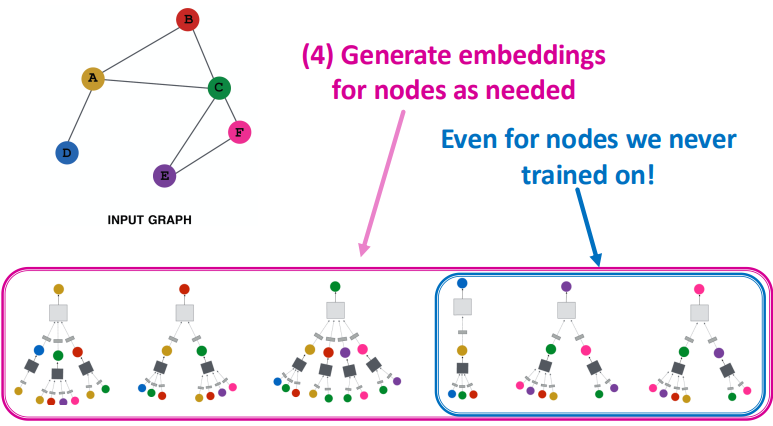

## Inductive Capability
- The same aggregation parameters are shared for all nodes:
    - The number of model parameters is sublinear in |V| and we can generalize to unseen nodes
    - 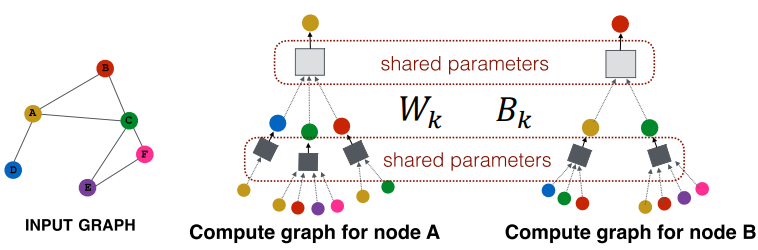
- New Graph
    - Eg., train on protien interaction graph from model organism A and generate embeddings on newly collected data about ogranism B
    - Inductive node embeeding -> Generalize to entirely unseen graphs
    - 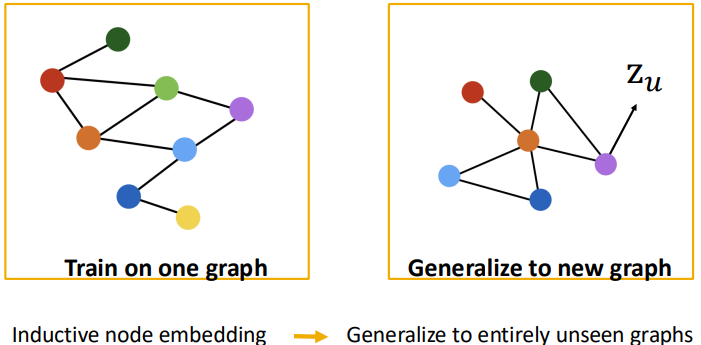
- New Node
    - Many application settings constantly encounter previously unseen nodes
    - Need to generate new embeddings 'on the fly'
    - 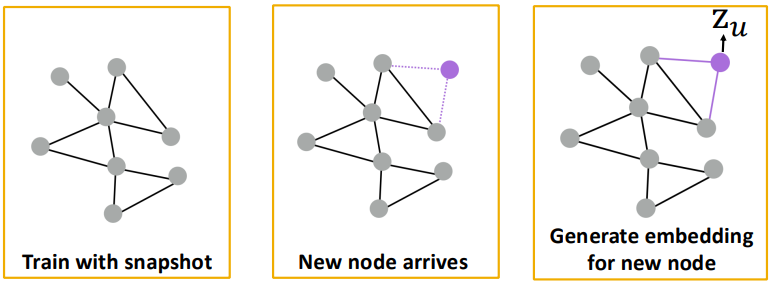

# Architecture Comparison
- How do GNNs compare to prominent architectures such as CNNs?

## convolutional Neural Network
- CNN layer with 3x3 filter
- 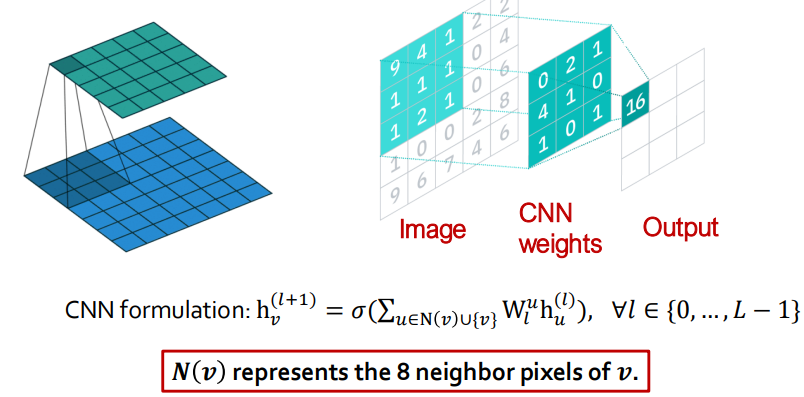

## GNN vs CNN 
- 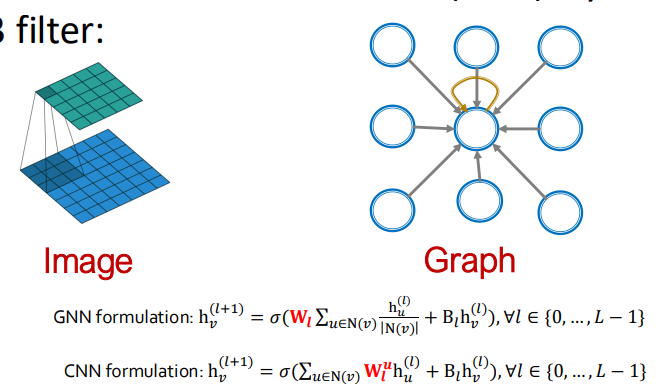
- CNN can be seen as a speical GNN with fixed neighbor size and ordering
    - The size of the filter is pre-defined for a CNN
    - The advantage of GNN is it process aritrary graphs with different degrees for each node.
- CNN is not permutation invariant/equivariant
    - Switching the order of pixel leads to different outputs
- Key difference: We can learn differnt (W^u)_l for different 'neighbor' u for pixel v on the image. The reason is we can pick an order for the 9 neighbors using relative position to the central pixel: {(-1, -1), (-1, 0), (-1, 1)...(1, 1)}
- 

## Transformer
- Transformers are among the most popular architectures that achive great performance in many sequence modeling tasks
- 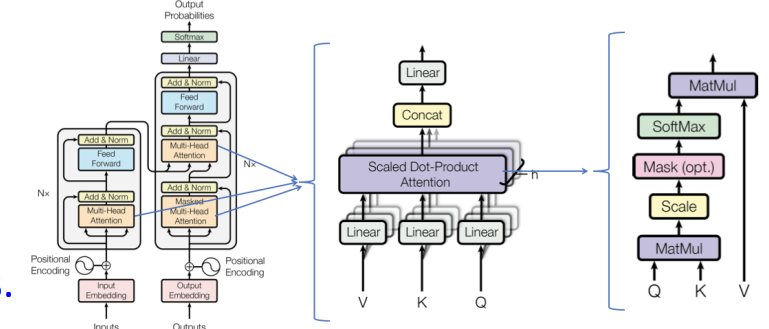
- Key component: self-attention
    - Every token/word attends to all the other tokens/words via matrix calculation.
    - 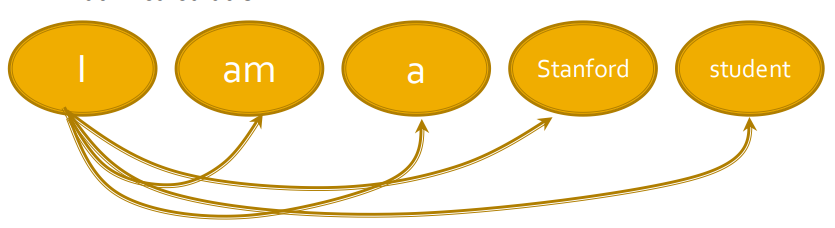
- A general definition of attention
    - Given a set of vectors values, and a vector query, attention is a technique to compute a weighted sum of the values, dependent on the query.
- Each token/word has a value vector and a query vector. The value vector can be seen as the representation of the token/word. We use the query vector to calculate the attention score (weights in the weighted sum)
    - 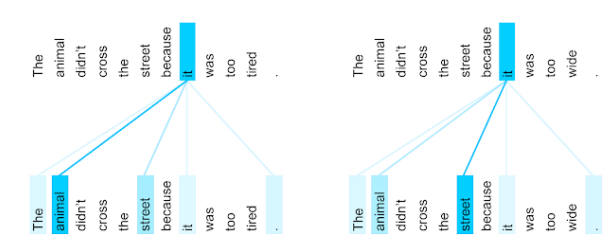

## GNN vs Transformer
- Transformer layer can be seen as a special GNN that runs on a full-connected 'word' graph!
- Since each word attends to all the other words, the computation graph of a transformer layer is identified to that of a GNN on the fully-connected 'word' graph.
- 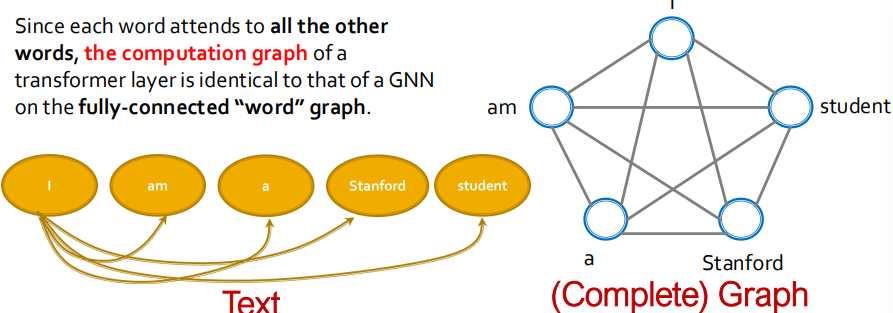

# Basics of Deep Learning

## Machine learning as optimization
- supervised learning: we are given input x, and the goal is to predict label y
- Input x can be:
    - vectors of real numbers
    - Sequences (natural language)
    - Matrices (images)
    - Graphs (potentially with node and edge features)
- We formulate the task as an optimization problem.
- Fomulate the task as an optimization problem
    - 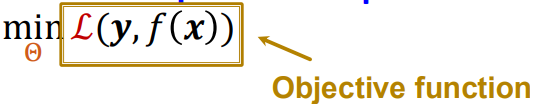
- Theta: a set of parameters we optimize
    - could contain one or more scalars, vectors, matrices
    - E.g. Theta = {Z} in the shallow encoder (the embedding lookup)
- Loss function L : E.g L2 loss
    - 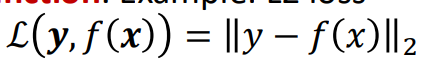

## Loss function example:
- one common loss for classification: cross entropy (CE)
- Label y is a categorical vector (one-hot encoding)
    e.g: y = [0, 0, 1, 0, 0], y is of a class 3
- 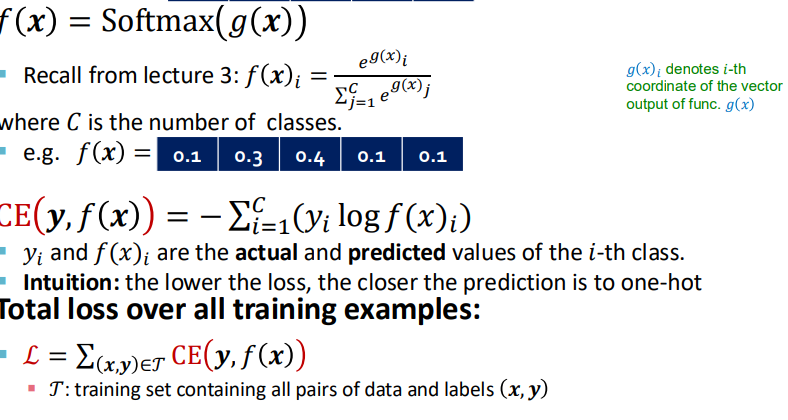

## Gradient Descent
- Gradient vector: Direction and rate of fastest increase
- directional derivative of a multi-variable function (e..g, L) along a given vector represents the instaneous rate of change of the function along the vector.
- Gradient is the directional derivative in the direction of largest increase.
- Iterative algorithm: Repeatedly update weights in the (opposite) direction of gradients until convergence
- Learning  rate (alpha):
    - Hyperparameter that controls the size of gradient step
    - Can vary over the course of training (LR scheduling)
- Ideal termination condition: gradient = 0
    - In practice, we stop training if it no longer improves performance on validation set (part of dataset we hold our from training).
 
## Stochastic Gradient Descent (SGD):
- Problem with gradient descent
    - Exact gradient requires computing the entire dataset
        - This means summing gradient contributions over all the points in the dataset
        - Modern datasets often contain billions of data points
        - Extremely expensive for every gradient descent step
- Solution: SGD
    - At every step, pick a differnt minibatch B contining a subset of the dataset, use it as input x
    - Common optimizer that improves over SGD
        - Adam, Adagrad, adadelta, RMSprop